In [34]:
import os
import time
import datetime
import numpy as np
from tqdm import tqdm
import logging
import copy
import torch
from torch import nn, optim
from torch.utils.data import DataLoader
import torchvision
from torchsummary import summary
from torch.utils.tensorboard import SummaryWriter
from torchvision import transforms, utils
import torch.nn.functional as F
import matplotlib.pyplot as plt

from FCN.network import Dilated_FCN
from UNet.unet import UNet
from util.dataset import NumpyDataset, ToTensor

In [5]:
model = UNet(n_channels=3, n_classes=5, n_features=32, bilinear=False)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device=device)
path = './checkpoint/D_UNet/fcn.pth.tar'

if os.path.exists(path):
    checkpoint = torch.load(path)
    logging.info("Reloading model from previously saved checkpoint")
    model.load_state_dict(checkpoint['state_dict'])

torch.Size([1, 3, 256, 256])
torch.Size([1, 256, 256])
torch.Size([256, 256])


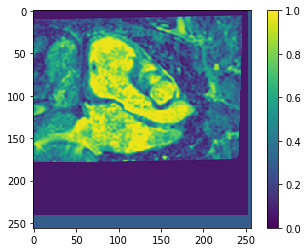

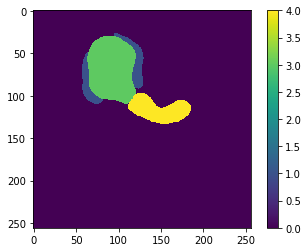

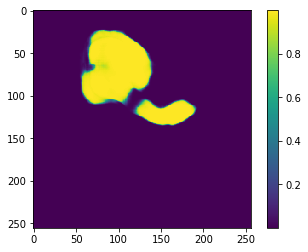

In [64]:
directory='/media/tianyu.han/mri-scratch/DeepLearning/Cardiac_4D/MRCT/'
val_dataloader = DataLoader(NumpyDataset(directory, mode='valid', 
                            transform=transforms.Compose([ToTensor()])), 
                            batch_size=1, shuffle=True, num_workers=32) 

for i_batch, sample in enumerate(val_dataloader):
    inputs, labels, labels_ = sample['buffers'], sample['labels'], sample['labels_']
    inputs = inputs.to(device, dtype= torch.float)  # (1, 3, 256, 256)
    labels = labels.to(device, dtype= torch.float)   # (1, 5, 256, 256)
    labels_ = labels_.to(device, dtype= torch.long)
    logits = model(inputs)
    preds_ = F.softmax(logits, dim=1)
    preds = torch.sum(preds_[0,1:], dim=0) 
    print(inputs.shape)
    print(labels_.shape)
    print(preds.shape)
    if i_batch == 0:
        plt.imshow(inputs[0,2,:,:].cpu().numpy())
        plt.colorbar()
        plt.show()
        plt.imshow(labels_[0,:,:].cpu().numpy())
        plt.colorbar()
        plt.show()
        plt.imshow(preds.detach().cpu().numpy())
        plt.colorbar()
        break

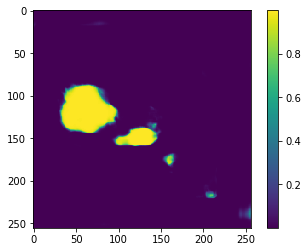

In [60]:
plt.imshow(preds.detach().cpu().numpy())
plt.colorbar()